In [ ]:
# This program classify images


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
#look at the data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get the shape of the arrays
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
# Take a look at the first images as an array
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

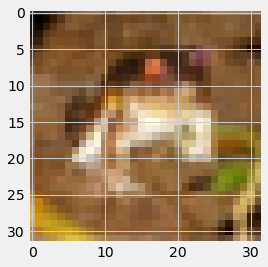

In [11]:
#show the image as a picture
img=plt.imshow(x_train[index])

In [12]:
# get the image label
print('The image label is: ',y_train[index])

The image label is:  [6]


In [14]:
#get the image classification
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is: ',classification[y_train[index][0]])

The image class is:  frog


In [16]:
#Convert the labels into a 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [17]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [18]:
#Print the new label of the image above
print('The one hot label is: ',y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [19]:
#Normilize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[index]

In [22]:
#Create the models architecture
model=Sequential()
# Add the first layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add(Conv2D(32,(5,5),activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [25]:
# Train the model
hist=model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=10,
               validation_split=0.2,

              
               )

Epoch 1/10
157/157 [==============================] - 55s 350ms/step - loss: 1.7716 - accuracy: 0.3331 - val_loss: 1.4694 - val_accuracy: 0.4598
Epoch 2/10
157/157 [==============================] - 55s 349ms/step - loss: 1.3913 - accuracy: 0.4910 - val_loss: 1.3535 - val_accuracy: 0.5136
Epoch 3/10
157/157 [==============================] - 55s 351ms/step - loss: 1.2255 - accuracy: 0.5577 - val_loss: 1.1479 - val_accuracy: 0.5873
Epoch 4/10
157/157 [==============================] - 55s 350ms/step - loss: 1.1154 - accuracy: 0.6001 - val_loss: 1.0897 - val_accuracy: 0.6116
Epoch 5/10
157/157 [==============================] - 55s 350ms/step - loss: 1.0326 - accuracy: 0.6336 - val_loss: 1.0125 - val_accuracy: 0.6382
Epoch 6/10
157/157 [==============================] - 58s 367ms/step - loss: 0.9565 - accuracy: 0.6613 - val_loss: 0.9549 - val_accuracy: 0.6621
Epoch 7/10
157/157 [==============================] - 55s 349ms/step - loss: 0.8706 - accuracy: 0.6898 - val_loss: 0.9675 - val_ac

In [26]:
# Evaluate the model using the test dataset
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.8689 - accuracy: 0.6990


0.6990000009536743

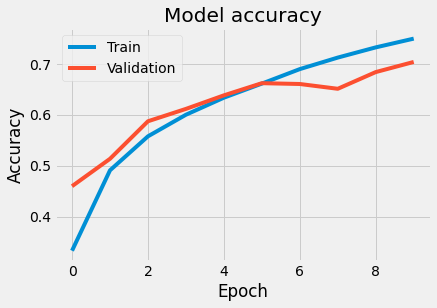

In [30]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

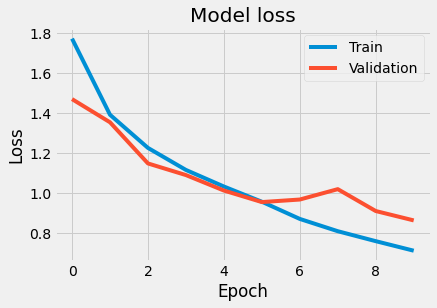

In [31]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [45]:
# Test the model with an example
from google.colab import files
uploded=files.upload()

Saving Cat03.jpg to Cat03.jpg


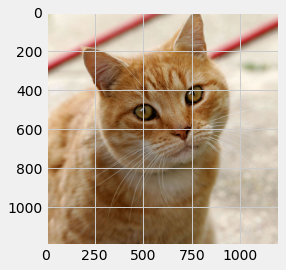

In [46]:
# Show the image
new_image=plt.imread('Cat03.jpg')
img=plt.imshow(new_image)

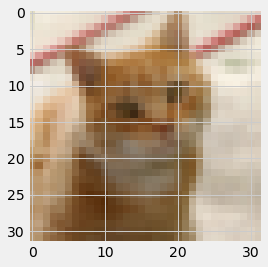

In [47]:
# Resize the image
from skimage.transform import resize
resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image)

In [48]:
# Get the model prediction
predictions=model.predict(np.array([resized_image])) #
# Show the predictions
predictions

array([[1.42114190e-03, 1.11969355e-04, 1.41258344e-01, 2.90737212e-01,
        2.42836252e-01, 2.33603835e-01, 3.59783880e-02, 5.32350354e-02,
        2.54711660e-04, 5.63124369e-04]], dtype=float32)

In [49]:
# Sort thepredictions from least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp
# Show the sorted labels in order
print(list_index)


[3, 4, 5, 2, 7, 6, 0, 9, 8, 1]


In [50]:
# Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

cat : 29.07 %
deer : 24.28 %
dog : 23.36 %
bird : 14.13 %
horse : 5.32 %
